In [267]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Data


In [268]:
# Importing lead dataset
lead_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Understanding & Cleaning the Data
Check for any nulls rows and unnecessary and filter the data

In [269]:
# checking the shape of the data
lead_data.shape

(9240, 37)

In [270]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [271]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [272]:
#We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [273]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [274]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [275]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [276]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [277]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<Axes: >

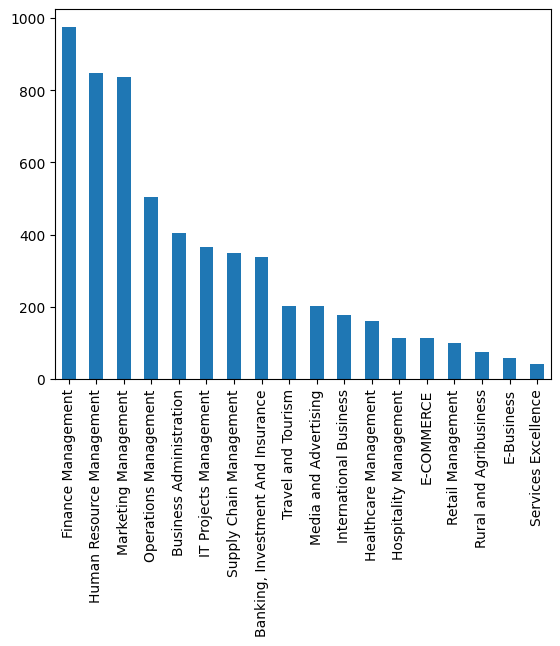

In [278]:
lead_data['Specialization'].value_counts().plot(kind='bar')

In [279]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

<Axes: >

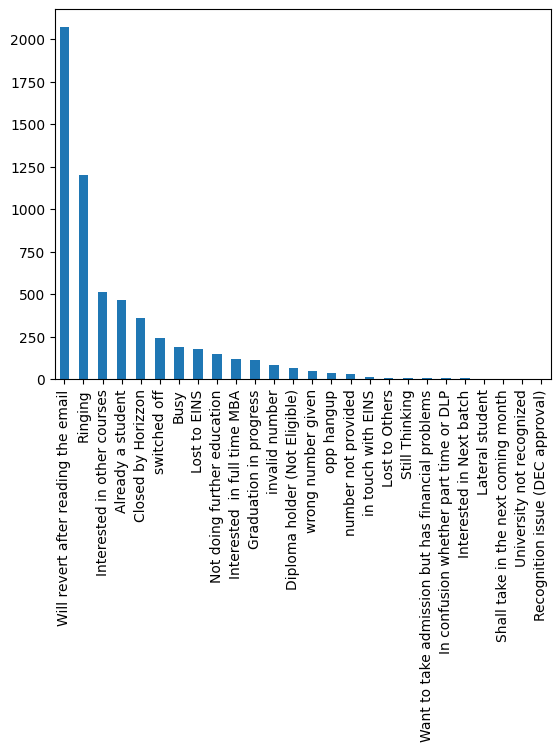

In [280]:
lead_data['Tags'].value_counts().plot(kind='bar')

<Axes: >

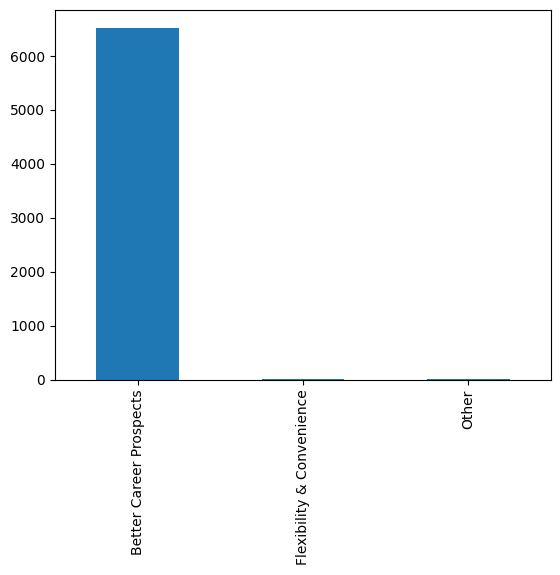

In [281]:
lead_data['What matters most to you in choosing a course'].value_counts().plot(kind='bar')

In [282]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [283]:
# Dropping this column
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Working Professional'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Housewife'),
  Text(5, 0, 'Businessman')])

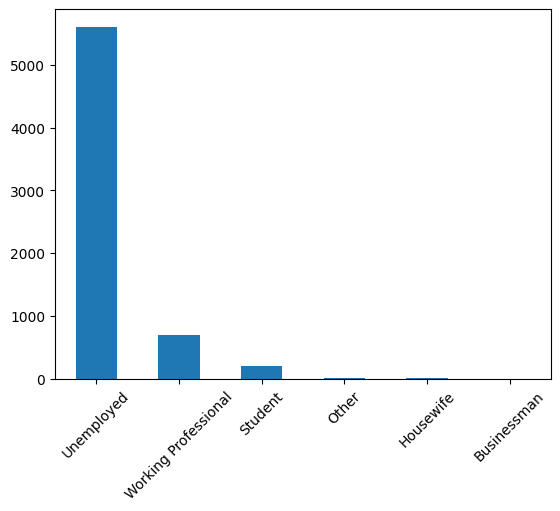

In [284]:
lead_data['What is your current occupation'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [285]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [286]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

<Axes: >

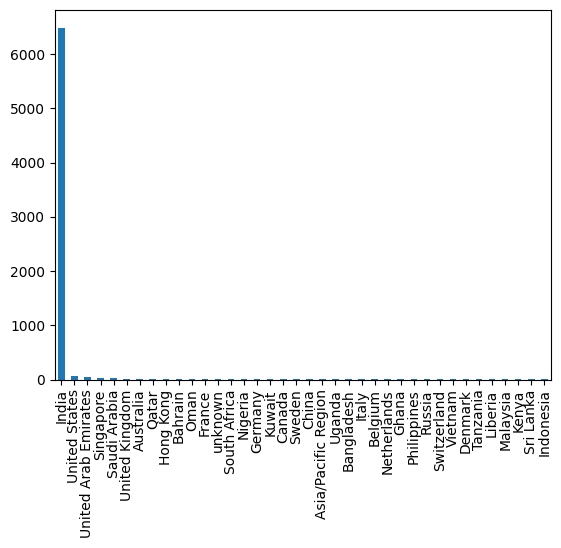

In [287]:
lead_data['Country'].value_counts().plot(kind='bar')

In [288]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

<Axes: >

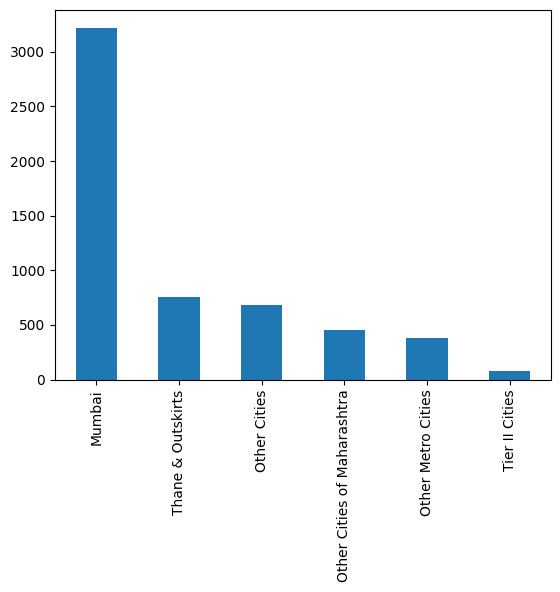

In [289]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['City'].value_counts().plot(kind='bar')

In [290]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [291]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [292]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

In [293]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [294]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [295]:
# Percentage of rows retained
(len(lead_data.index)/9240)*100

62.196969696969695

We have retained **98%** of the rows after cleaning the data .

## Exploratory Data Anaysis
Checking for duplicates:

In [296]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Univariate Analysis and Bivariate Analysis

In [297]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

45.50200104402297

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

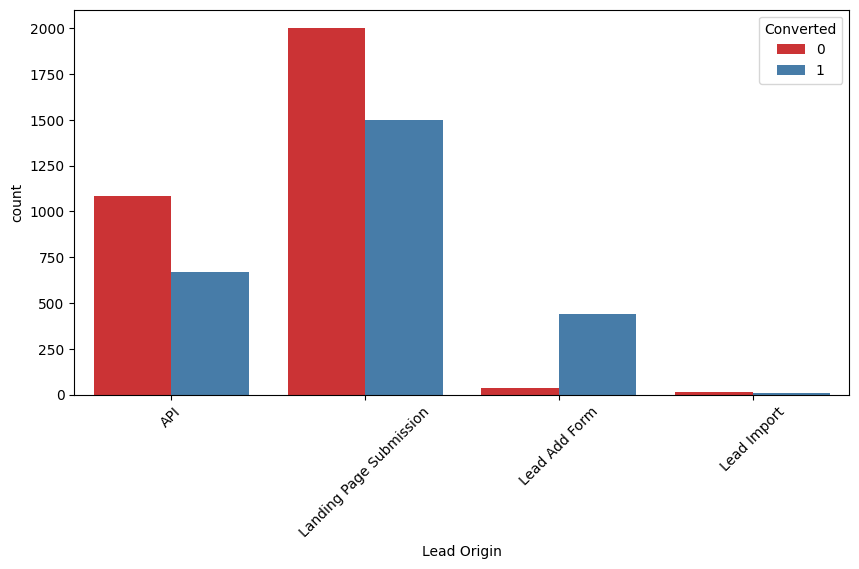

In [298]:
#2) Lead Origin
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

###Inference :
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Live Chat'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release')])

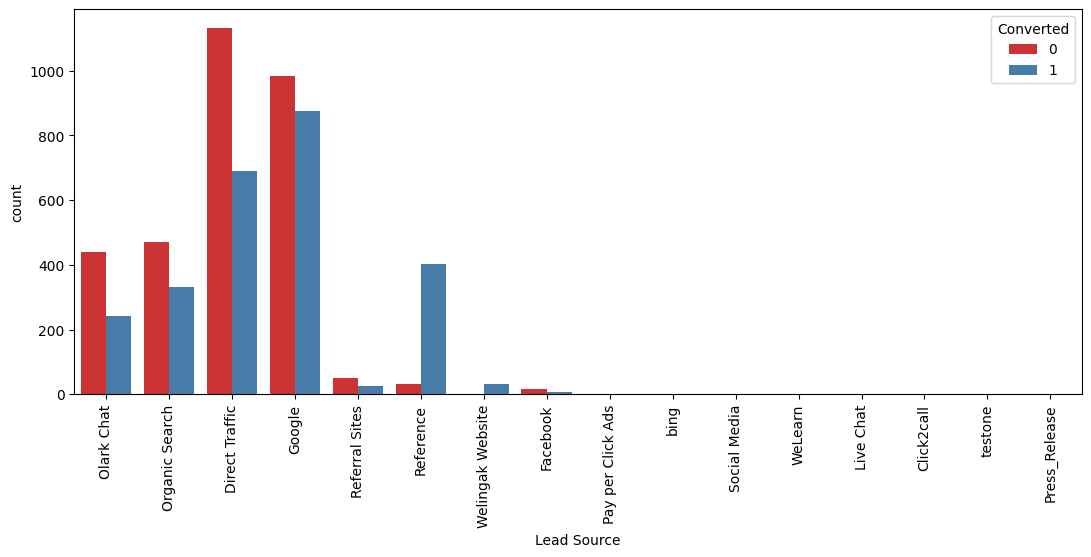

In [299]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [300]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Live Chat'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release')])

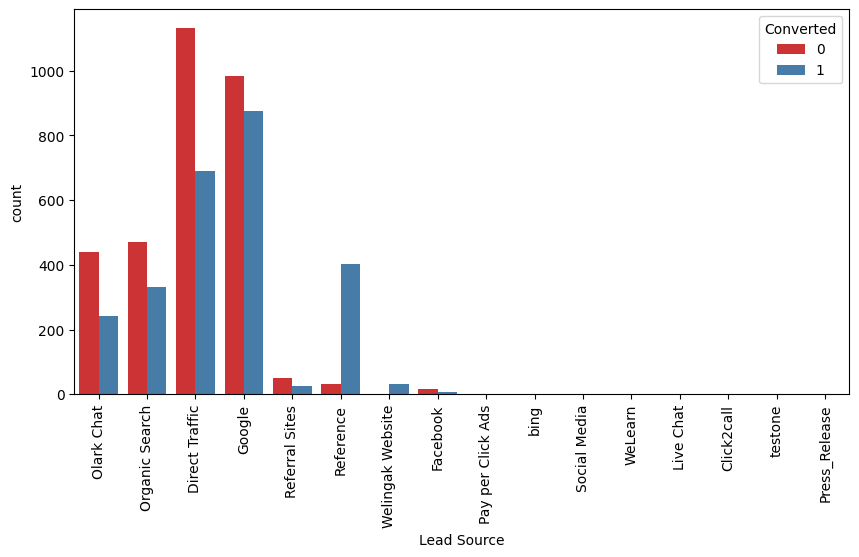

In [301]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Inference
Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

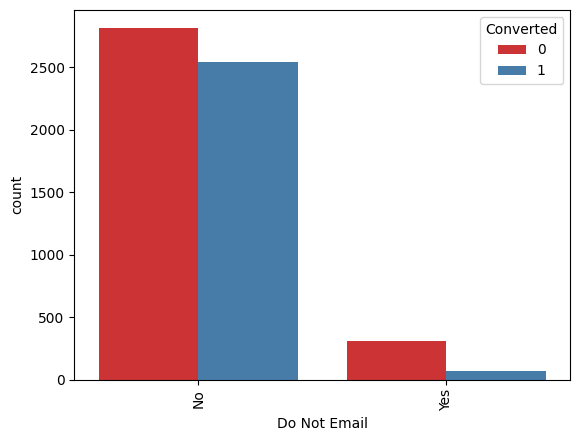

In [302]:
#Do not Email
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### **Inference**
Most entries are 'No'. No Inference can be drawn with this parameter.

In [303]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5747.000000
mean        3.727336
std         4.907139
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.540000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

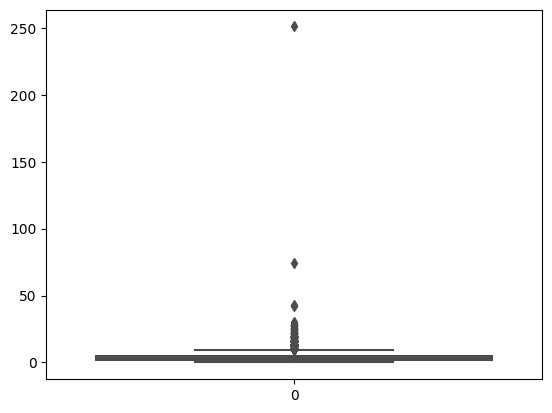

In [304]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [305]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

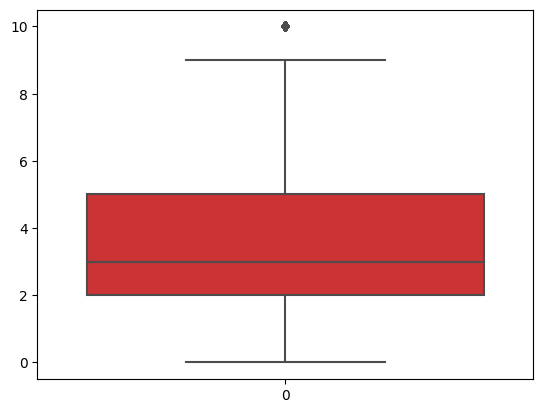

In [306]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

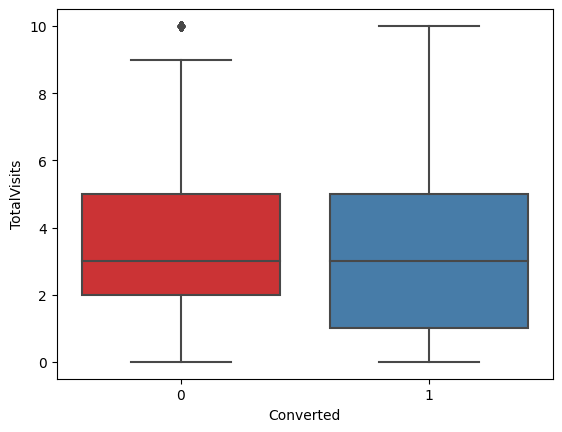

In [307]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

####Inference
Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.



In [308]:
#Total Time Spent on Website
lead_data['Total Time Spent on Website'].describe()

count    5747.000000
mean      546.275448
std       564.053620
min         0.000000
25%        57.000000
50%       300.000000
75%      1030.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

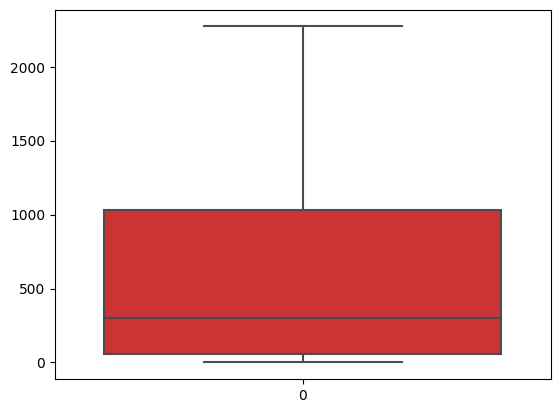

In [309]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

###Inference
Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

In [310]:
#Page Views Per Visit
lead_data['Page Views Per Visit'].describe()

count    5747.000000
mean        2.579245
std         2.062009
min         0.000000
25%         1.250000
50%         2.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

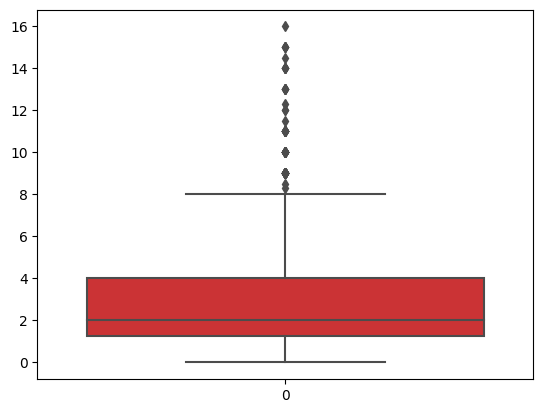

In [311]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

<Axes: >

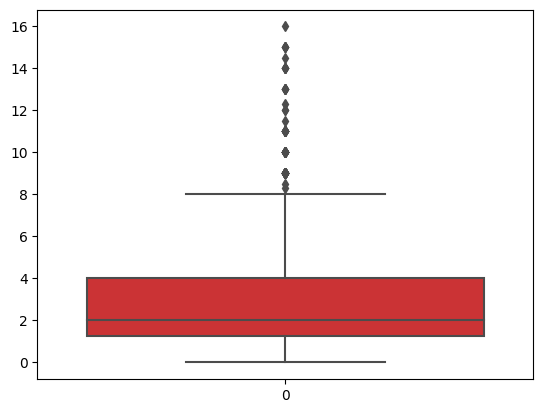

In [312]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

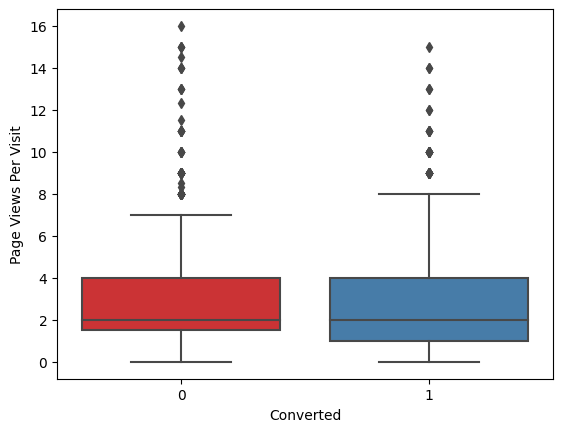

In [313]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

###Inference
Median for converted and unconverted leads is the same.

###Last Activity

In [314]:
lead_data['Last Activity'].describe()

count             5747
unique              17
top       Email Opened
freq              2221
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'View in browser link Clicked'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'Email Bounced'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

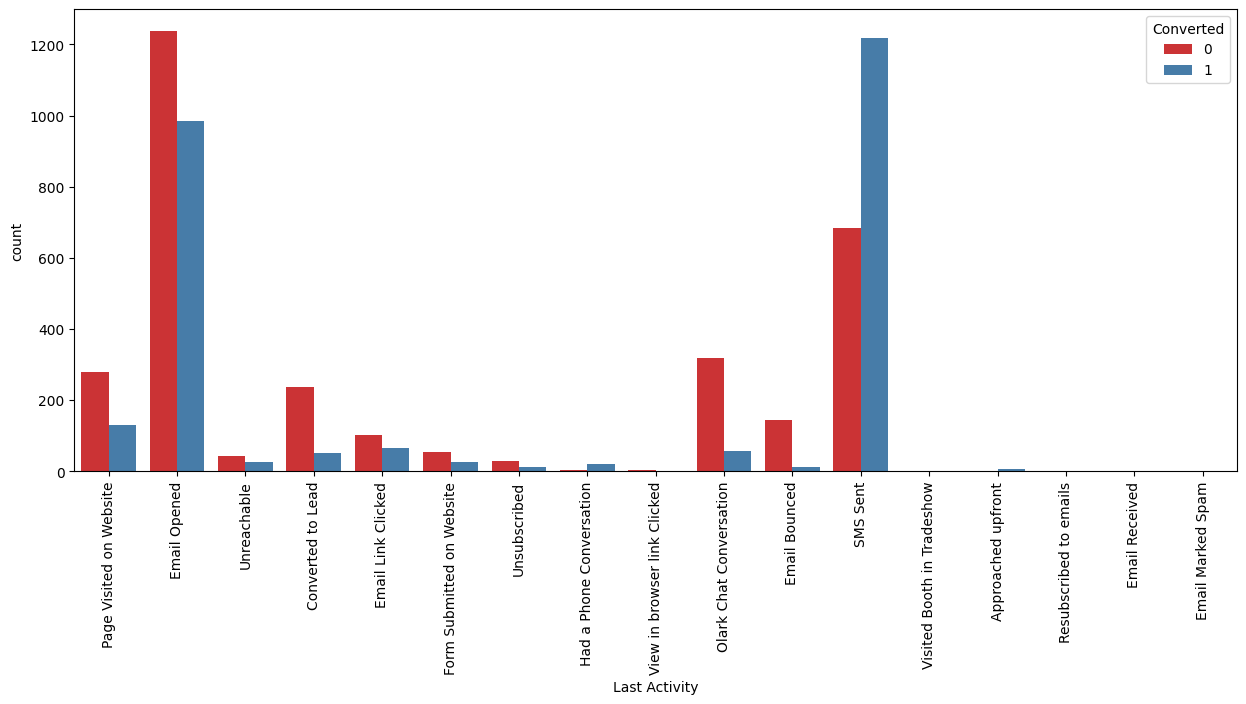

In [315]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [316]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Other_Activity'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'Email Bounced'),
  Text(10, 0, 'SMS Sent')])

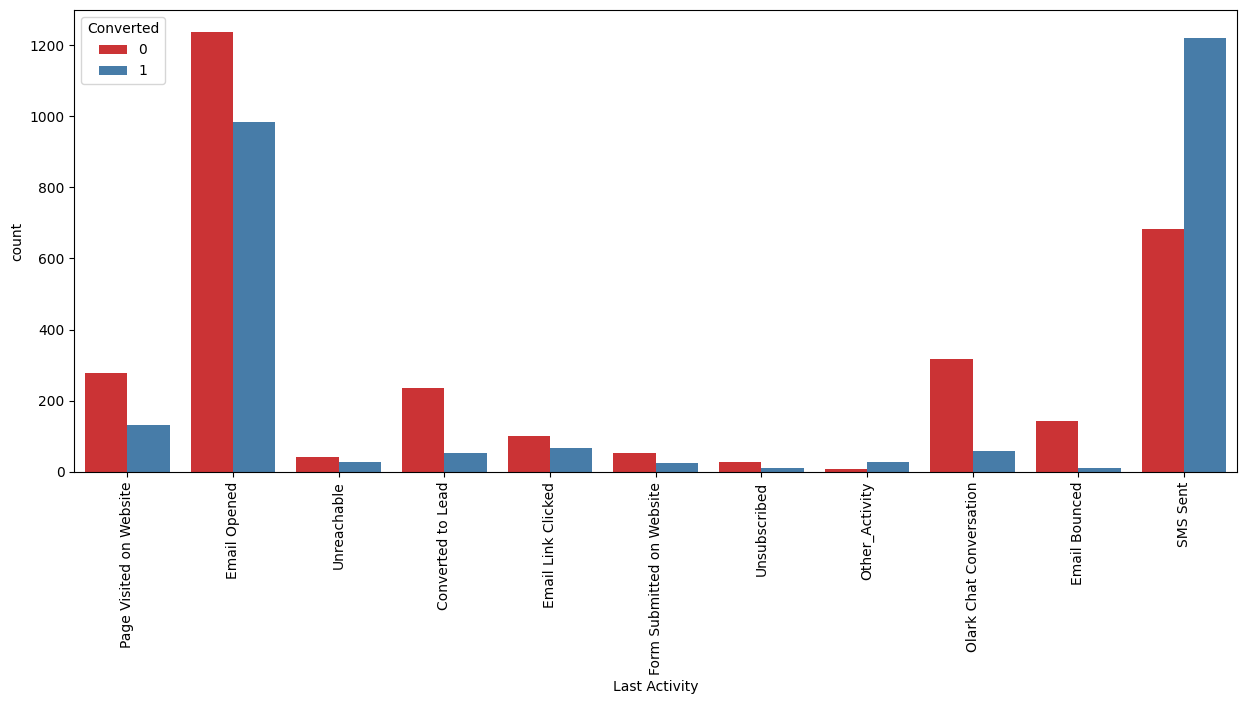

In [317]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.

##Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Oman'),
  Text(2, 0, 'United Arab Emirates'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Bahrain'),
  Text(6, 0, 'Qatar'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Ghana'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Saudi Arabia'),
  Text(11, 0, 'Sri Lanka'),
  Text(12, 0, 'Kuwait'),
  Text(13, 0, 'France'),
  Text(14, 0, 'Canada'),
  Text(15, 0, 'Netherlands'),
  Text(16, 0, 'Sweden'),
  Text(17, 0, 'Hong Kong'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Uganda'),
  Text(21, 0, 'Kenya'),
  Text(22, 0, 'South Africa'),
  Text(23, 0, 'Tanzania'),
  Text(24, 0, 'Malaysia'),
  Text(25, 0, 'Italy'),
  Text(26, 0, 'Denmark'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Vietnam'),
  Text(29, 0, 'Indonesia'),
  Text(30, 0, 'China'),
  Text(31, 0, 'Banglad

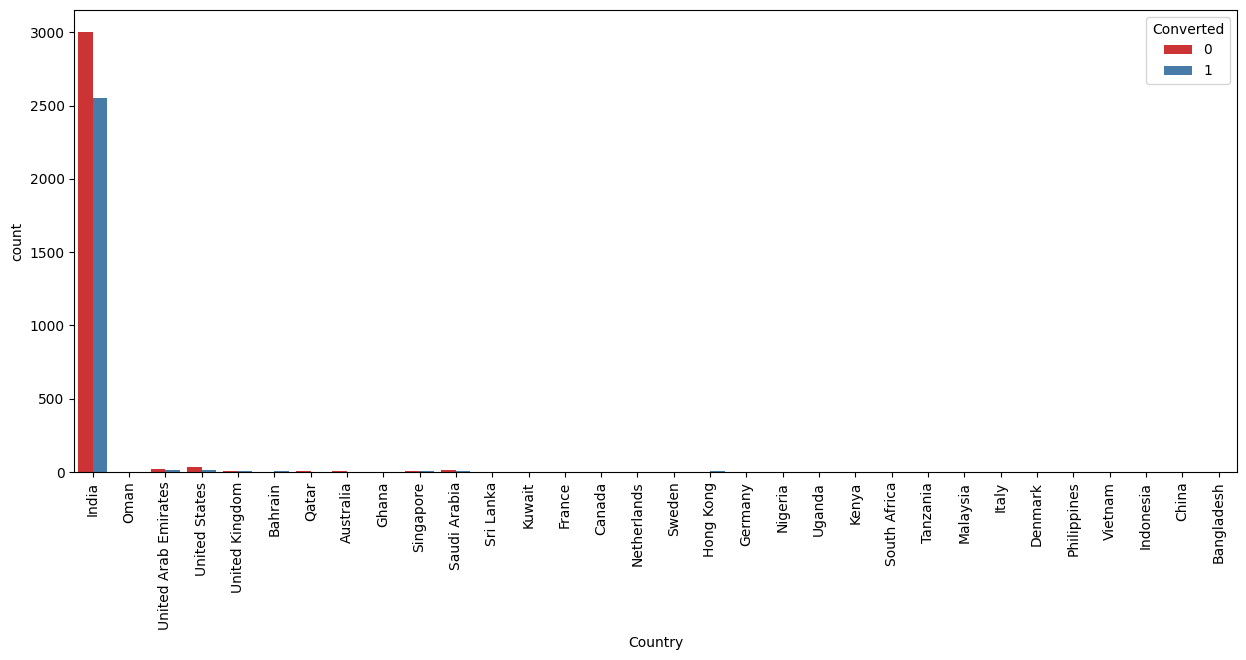

In [318]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most values are 'India' no such inference can be drawn

###Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'Travel and Tourism'),
  Text(5, 0, 'Human Resource Management'),
  Text(6, 0, 'Marketing Management'),
  Text(7, 0, 'Banking, Investment And Insurance'),
  Text(8, 0, 'Finance Management'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'IT Projects Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

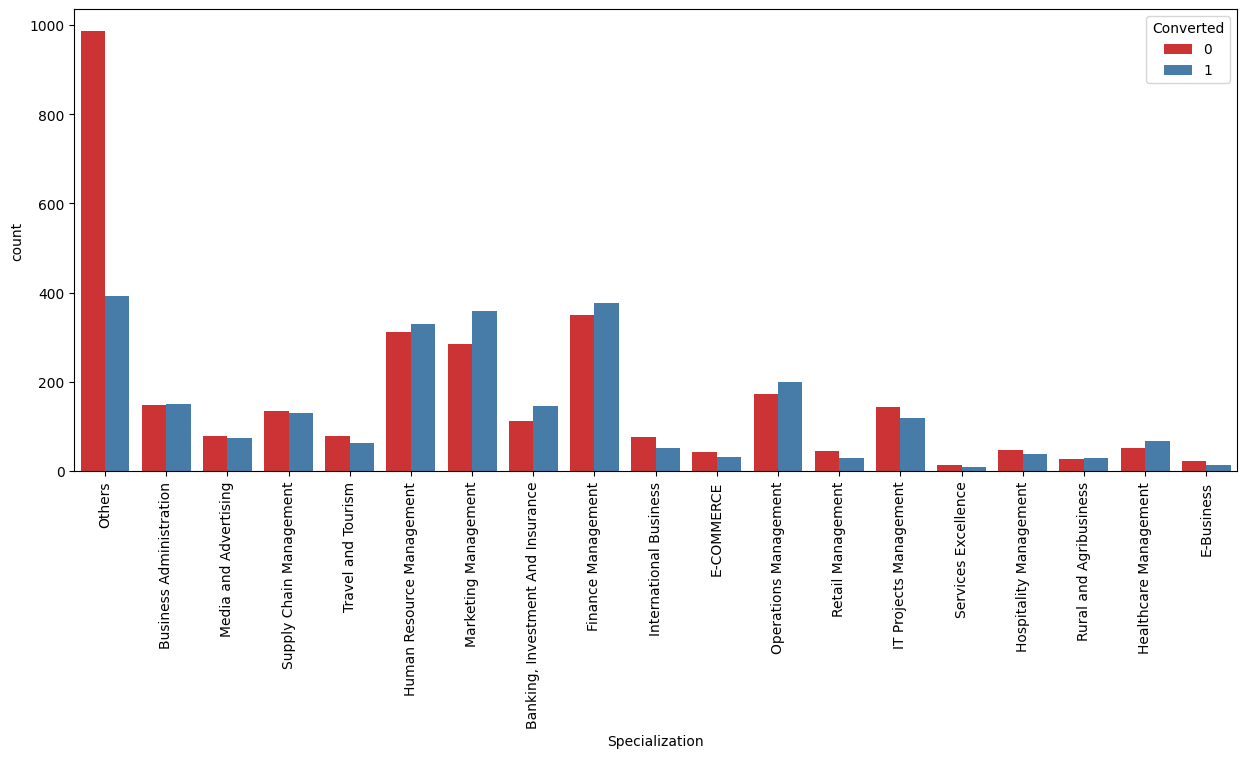

In [319]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Focus should be more on the Specialization with high conversion rate.

### What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

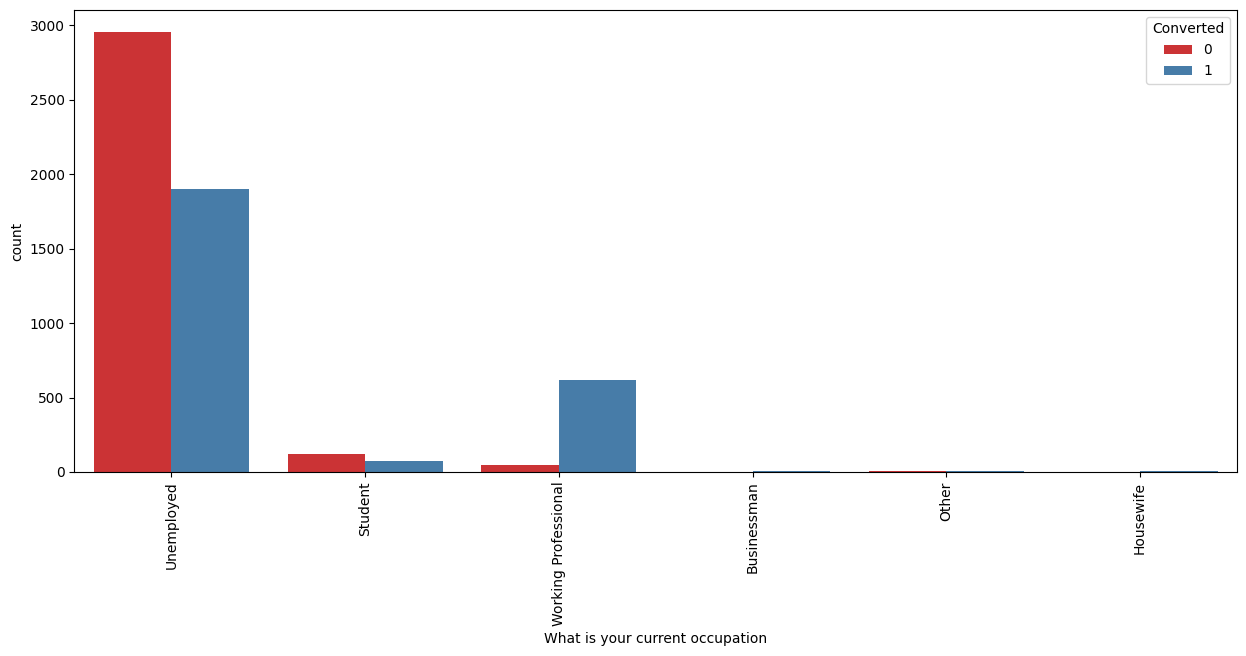

In [320]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

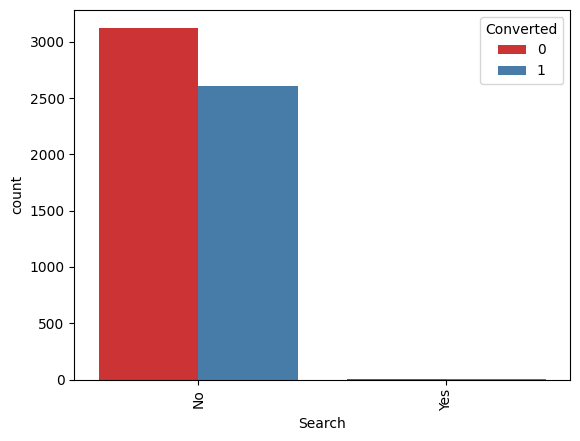

In [321]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###Magazine

(array([0]), [Text(0, 0, 'No')])

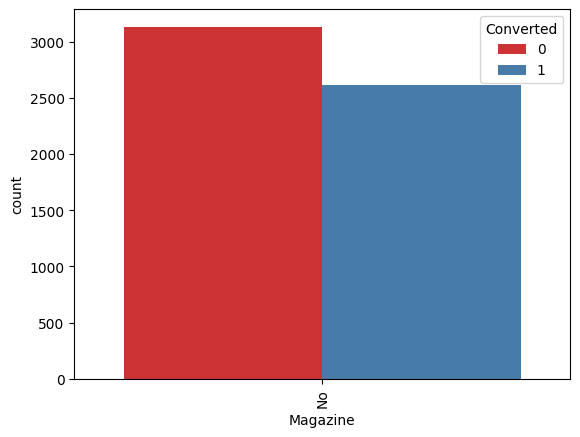

In [322]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

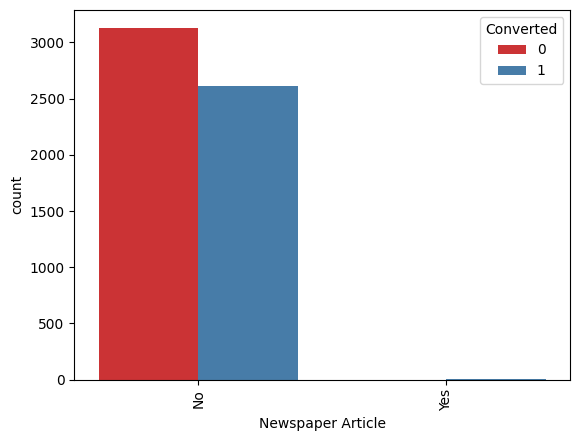

In [323]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([0]), [Text(0, 0, 'No')])

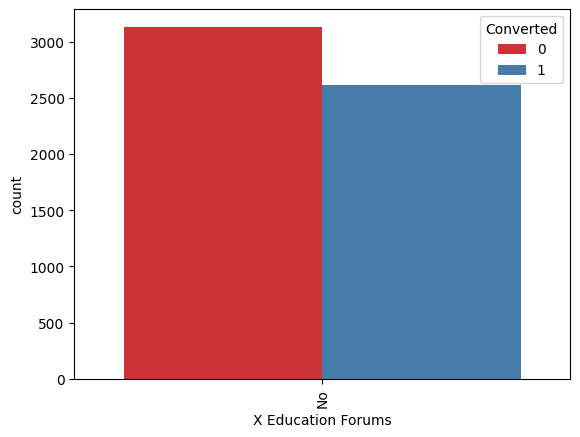

In [324]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###X Education Forums

(array([0]), [Text(0, 0, 'No')])

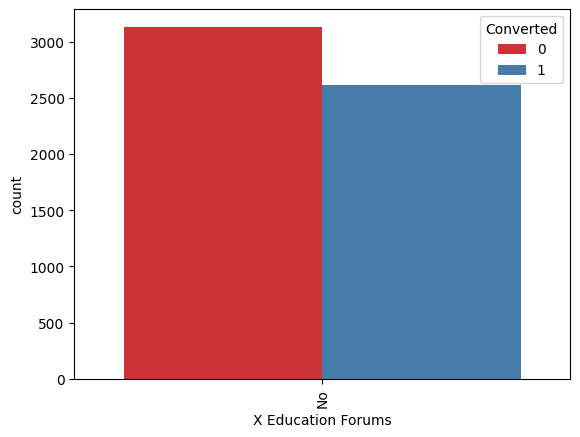

In [325]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

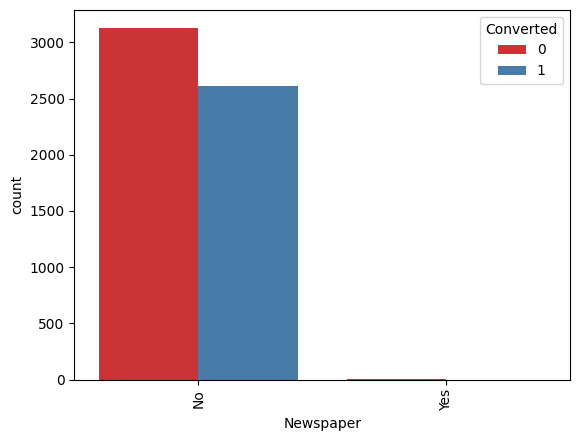

In [326]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

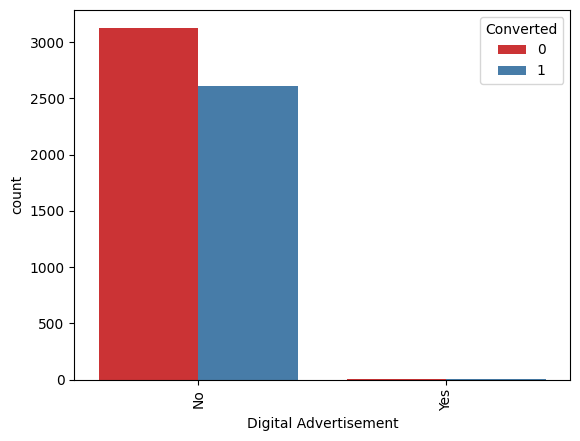

In [327]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

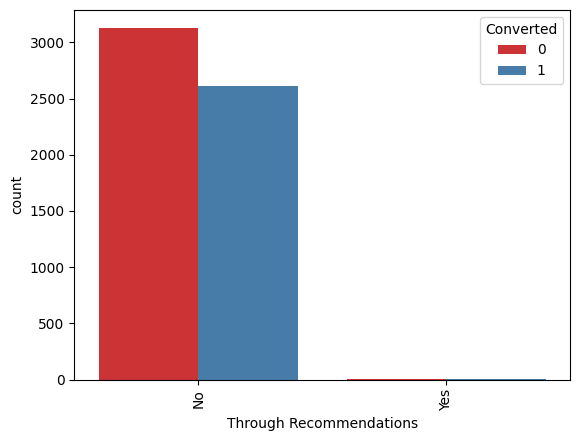

In [328]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([0]), [Text(0, 0, 'No')])

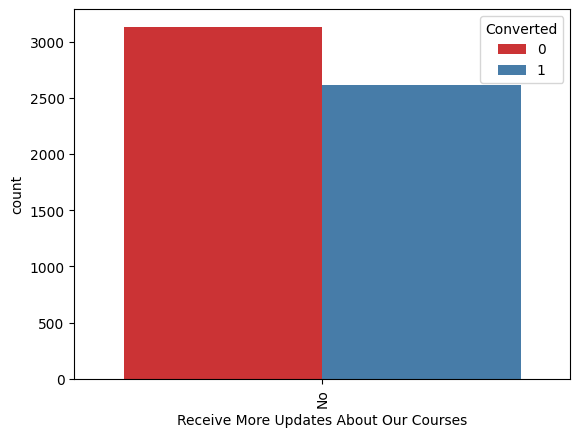

In [329]:
#Receive More Updates About Our Courses
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

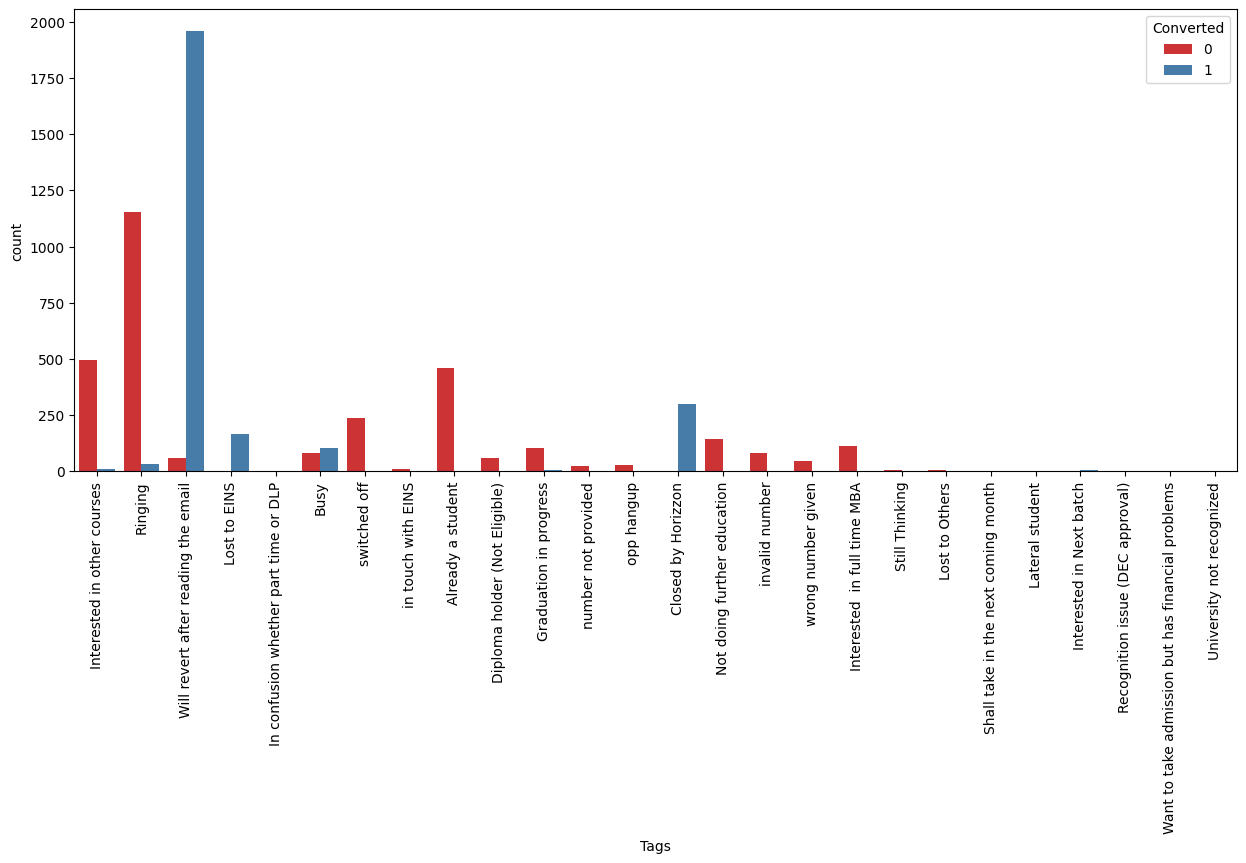

In [330]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

(array([0]), [Text(0, 0, 'No')])

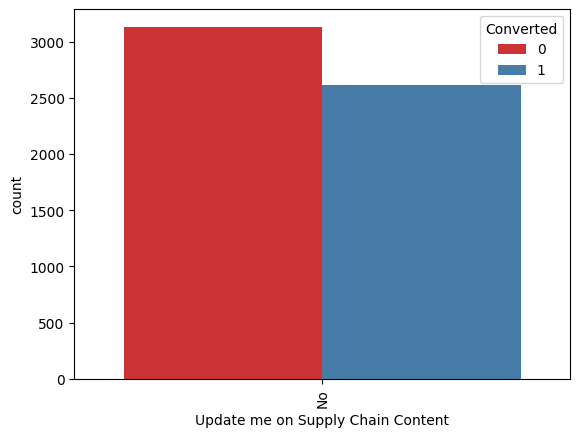

In [331]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([0]), [Text(0, 0, 'No')])

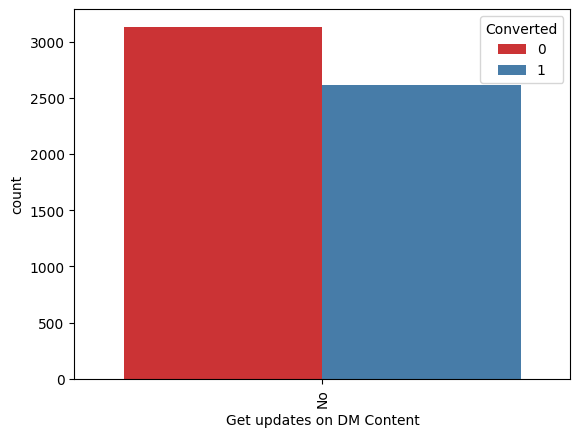

In [332]:
#Get updates on DM Content
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Other Metro Cities'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

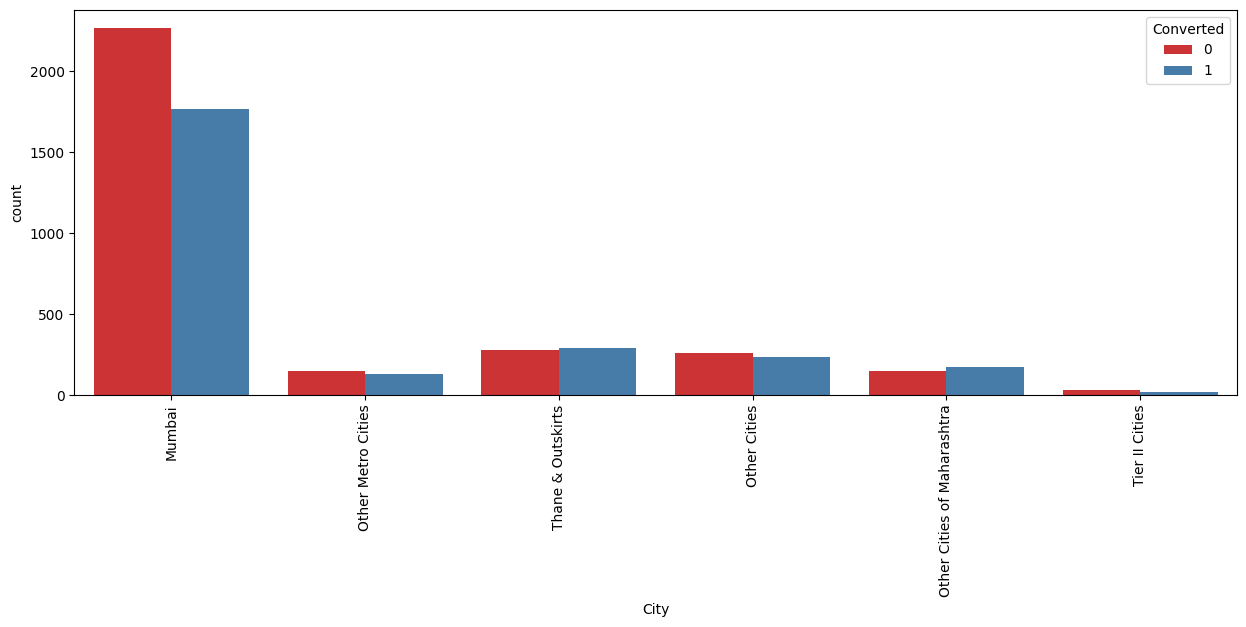

In [333]:
#City
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most leads are from mumbai with around 50% conversion rate.

(array([0]), [Text(0, 0, 'No')])

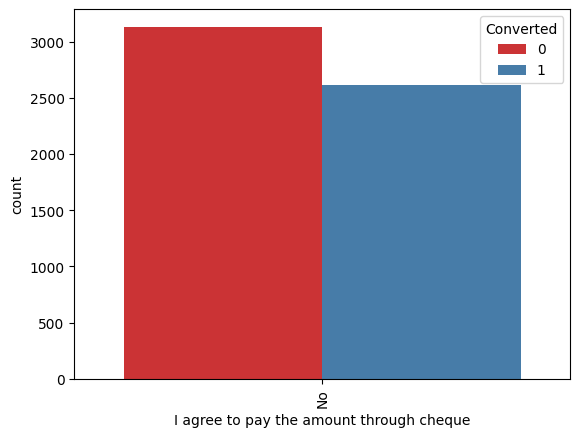

In [334]:
#I agree to pay the amount through cheque
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

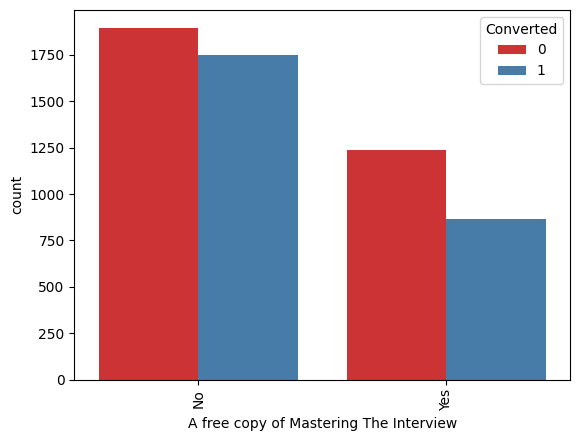

In [335]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Link Clicked'),
  Text(4, 0, 'Unreachable'),
  Text(5, 0, 'Unsubscribed'),
  Text(6, 0, 'Had a Phone Conversation'),
  Text(7, 0, 'Email Bounced'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam')])

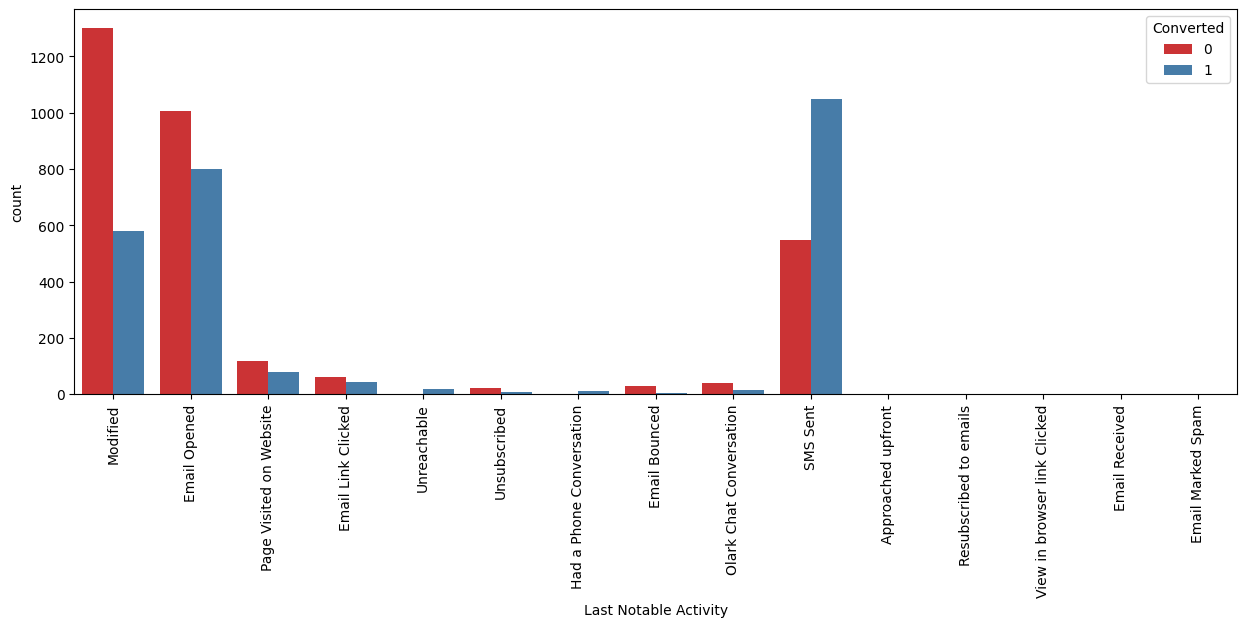

In [336]:
# Last Notable Activity
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

###Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [337]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [338]:
lead_data.shape

(5747, 14)

In [339]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      5747 non-null   object 
 1   Lead Origin                      5747 non-null   object 
 2   Lead Source                      5747 non-null   object 
 3   Do Not Email                     5747 non-null   object 
 4   Do Not Call                      5747 non-null   object 
 5   Converted                        5747 non-null   int64  
 6   TotalVisits                      5747 non-null   float64
 7   Total Time Spent on Website      5747 non-null   int64  
 8   Page Views Per Visit             5747 non-null   float64
 9   Last Activity                    5747 non-null   object 
 10  Specialization                   5747 non-null   object 
 11  What is your current occupation  5747 non-null   object 
 12  City                

##Data Preparation

In [340]:
#) Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [341]:
#Creating Dummy variables for the categorical features: 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()




,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [342]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [343]:
#Dropping the columns for which dummies were created
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [344]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [345]:
#Splitting the data into train and test set.
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [346]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [347]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [348]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1489,0,0,-0.528597,0.607116,-0.285431,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6678,0,0,-1.256686,-0.964267,-1.258247,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8881,1,0,-0.528597,-0.903760,-0.285431,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2512,0,0,0.563536,0.085694,1.173792,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1227,0,0,-0.528597,-0.921556,-0.285431,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [349]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

45.50200104402297

###Feature Selection Using RFE

In [350]:
#feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [351]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True,  True, False])

In [352]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_testone', False, 17),
 ('Last Activity_Email Bounced', False, 51),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last

In [353]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

###Model Building
Assessing the model with StatsModels

Model-1

In [354]:
import statsmodels.api as sm

In [355]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4001
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.3
Date:                Tue, 16 Jan 2024   Deviance:                       3566.7
Time:                        14:50:17   Pearson chi2:                 4.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7915      0.197      4.014      0.000       0.405       1.178
Do Not Email                                            -1.3013      0.224     -5.812      0.000      -1.740      -0.862
Total Time Spent on Website                              1.0663      0.048     22.078      0.000       0.972       1.161
Lead Origin_Landing Page Submission                     -0.6800      0.151     -4.503      0.000      -0.976      -0.384
Lead Origin_Lead Add Form                                2.4252      0.259      9.380      0.000       1.919       2.932
Lead Source_Direct Traffic                              -1.3122      0.187     -7.016      0.000      -1.679      -0.946
Lead Source_Google                                      -0.8759      0.166     -5.262      0.000      -1.202      -0.550
Lead Source_Organic Search                              -1.0954      0.188     -5.824      0.000      -1.464      -0.727
Lead Source_Referral Sites                              -0.9550      0.410     -2.332      0.020      -1.758      -0.152
Lead Source_Welingak Website                            21.8266   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Activity_Email Opened                               0.9673      0.178      5.431      0.000       0.618       1.316
Last Activity_Other_Activity                             1.6183      0.610      2.653      0.008       0.423       2.814
Last Activity_SMS Sent                                   1.1673      0.137      8.505      0.000       0.898       1.436
Specialization_Others                                   -1.2277      0.145     -8.475      0.000      -1.512      -0.944
What is your current occupation_Housewife               23.1668   3.61e+04      0.001      0.999   -7.06e+04    7.07e+04
What is your current occupation_Working Professional     2.4230      0.199     12.149      0.000       2.032       2.814
Last Notable Activity_Email Opened                      -0.9063      0.213     -4.254      0.000      -1.324      -0.489
Last Notable Activity_Had a Phone Conversation          22.2338   2.67e+04      0.001      0.999   -5.23e+04    5.24e+04
Last Notable Activity_Modified                          -0.7481      0.138     -5.414      0.000      -1.019      -0.477
Last Notable Activity_Unreachable                        3.0360      1.106      2.746      0.006       0.869       5.203
Last Notable Activity_Unsubscribed                       0.9316      0.620      1.502      0.133      -0.284       2.147
========================================================================================================================
"""

###Conclusion
Since Pvalue of `What is your current occupation_Housewife` is very high, we can drop this column.

In [356]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

###Model-2

In [357]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4002
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1785.4
Date:                Tue, 16 Jan 2024   Deviance:                       3570.9
Time:                        14:50:18   Pearson chi2:                 4.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3868
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7923      0.197      4.019      0.000       0.406       1.179
Do Not Email                                            -1.3018      0.224     -5.813      0.000      -1.741      -0.863
Total Time Spent on Website                              1.0672      0.048     22.098      0.000       0.973       1.162
Lead Origin_Landing Page Submission                     -0.6814      0.151     -4.517      0.000      -0.977      -0.386
Lead Origin_Lead Add Form                                2.4294      0.258      9.399      0.000       1.923       2.936
Lead Source_Direct Traffic                              -1.3108      0.187     -7.009      0.000      -1.677      -0.944
Lead Source_Google                                      -0.8750      0.166     -5.256      0.000      -1.201      -0.549
Lead Source_Organic Search                              -1.0941      0.188     -5.820      0.000      -1.463      -0.726
Lead Source_Referral Sites                              -0.9575      0.410     -2.338      0.019      -1.760      -0.155
Lead Source_Welingak Website                            21.8224   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Activity_Email Opened                               0.9790      0.178      5.508      0.000       0.631       1.327
Last Activity_Other_Activity                             1.6182      0.610      2.652      0.008       0.422       2.814
Last Activity_SMS Sent                                   1.1674      0.137      8.503      0.000       0.898       1.436
Specialization_Others                                   -1.2315      0.145     -8.506      0.000      -1.515      -0.948
What is your current occupation_Working Professional     2.4199      0.199     12.133      0.000       2.029       2.811
Last Notable Activity_Email Opened                      -0.9137      0.213     -4.296      0.000      -1.331      -0.497
Last Notable Activity_Had a Phone Conversation          22.2331   2.67e+04      0.001      0.999   -5.23e+04    5.24e+04
Last Notable Activity_Modified                          -0.7479      0.138     -5.412      0.000      -1.019      -0.477
Last Notable Activity_Unreachable                        3.0361      1.106      2.746      0.006       0.869       5.203
Last Notable Activity_Unsubscribed                       0.9315      0.620      1.501      0.133      -0.285       2.148
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [358]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [359]:
#Model 3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4003
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1786.9
Date:                Tue, 16 Jan 2024   Deviance:                       3573.8
Time:                        14:50:18   Pearson chi2:                 4.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8033      0.197      4.077      0.000       0.417       1.189
Do Not Email                                            -1.3091      0.224     -5.839      0.000      -1.748      -0.870
Total Time Spent on Website                              1.0666      0.048     22.088      0.000       0.972       1.161
Lead Origin_Landing Page Submission                     -0.6764      0.151     -4.484      0.000      -0.972      -0.381
Lead Origin_Lead Add Form                                2.4297      0.259      9.397      0.000       1.923       2.936
Lead Source_Direct Traffic                              -1.3161      0.187     -7.037      0.000      -1.683      -0.950
Lead Source_Google                                      -0.8755      0.167     -5.258      0.000      -1.202      -0.549
Lead Source_Organic Search                              -1.0942      0.188     -5.823      0.000      -1.462      -0.726
Lead Source_Referral Sites                              -0.9567      0.410     -2.335      0.020      -1.760      -0.154
Lead Source_Welingak Website                            21.8274   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Activity_Email Opened                               0.9836      0.178      5.534      0.000       0.635       1.332
Last Activity_Other_Activity                             2.0050      0.551      3.641      0.000       0.926       3.084
Last Activity_SMS Sent                                   1.1583      0.137      8.449      0.000       0.890       1.427
Specialization_Others                                   -1.2327      0.145     -8.511      0.000      -1.517      -0.949
What is your current occupation_Working Professional     2.4186      0.200     12.123      0.000       2.028       2.810
Last Notable Activity_Email Opened                      -0.9303      0.212     -4.380      0.000      -1.347      -0.514
Last Notable Activity_Modified                          -0.7642      0.138     -5.547      0.000      -1.034      -0.494
Last Notable Activity_Unreachable                        3.0246      1.106      2.736      0.006       0.858       5.191
Last Notable Activity_Unsubscribed                       0.9262      0.620      1.493      0.135      -0.290       2.142
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [361]:
# col1 = col1.drop('What is your current occupation_Student')

In [362]:
#Model 4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4003
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1786.9
Date:                Tue, 16 Jan 2024   Deviance:                       3573.8
Time:                        14:50:45   Pearson chi2:                 4.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8033      0.197      4.077      0.000       0.417       1.189
Do Not Email                                            -1.3091      0.224     -5.839      0.000      -1.748      -0.870
Total Time Spent on Website                              1.0666      0.048     22.088      0.000       0.972       1.161
Lead Origin_Landing Page Submission                     -0.6764      0.151     -4.484      0.000      -0.972      -0.381
Lead Origin_Lead Add Form                                2.4297      0.259      9.397      0.000       1.923       2.936
Lead Source_Direct Traffic                              -1.3161      0.187     -7.037      0.000      -1.683      -0.950
Lead Source_Google                                      -0.8755      0.167     -5.258      0.000      -1.202      -0.549
Lead Source_Organic Search                              -1.0942      0.188     -5.823      0.000      -1.462      -0.726
Lead Source_Referral Sites                              -0.9567      0.410     -2.335      0.020      -1.760      -0.154
Lead Source_Welingak Website                            21.8274   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Activity_Email Opened                               0.9836      0.178      5.534      0.000       0.635       1.332
Last Activity_Other_Activity                             2.0050      0.551      3.641      0.000       0.926       3.084
Last Activity_SMS Sent                                   1.1583      0.137      8.449      0.000       0.890       1.427
Specialization_Others                                   -1.2327      0.145     -8.511      0.000      -1.517      -0.949
What is your current occupation_Working Professional     2.4186      0.200     12.123      0.000       2.028       2.810
Last Notable Activity_Email Opened                      -0.9303      0.212     -4.380      0.000      -1.347      -0.514
Last Notable Activity_Modified                          -0.7642      0.138     -5.547      0.000      -1.034      -0.494
Last Notable Activity_Unreachable                        3.0246      1.106      2.736      0.006       0.858       5.191
Last Notable Activity_Unsubscribed                       0.9262      0.620      1.493      0.135      -0.290       2.142
========================================================================================================================
"""

Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [363]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [364]:
# Model-5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4004
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Tue, 16 Jan 2024   Deviance:                       3689.0
Time:                        14:50:45   Pearson chi2:                 4.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5195      0.182      8.333      0.000       1.162       1.877
Do Not Email                                            -1.2093      0.218     -5.539      0.000      -1.637      -0.781
Total Time Spent on Website                              1.0653      0.049     21.930      0.000       0.970       1.161
Lead Origin_Landing Page Submission                     -0.8443      0.149     -5.652      0.000      -1.137      -0.552
Lead Source_Direct Traffic                              -1.9843      0.175    -11.353      0.000      -2.327      -1.642
Lead Source_Google                                      -1.5444      0.152    -10.131      0.000      -1.843      -1.246
Lead Source_Organic Search                              -1.7640      0.176    -10.026      0.000      -2.109      -1.419
Lead Source_Referral Sites                              -1.6021      0.408     -3.924      0.000      -2.402      -0.802
Lead Source_Welingak Website                            23.6062   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Last Activity_Email Opened                               1.0765      0.173      6.240      0.000       0.738       1.415
Last Activity_Other_Activity                             2.1404      0.539      3.968      0.000       1.083       3.198
Last Activity_SMS Sent                                   1.3073      0.135      9.682      0.000       1.043       1.572
Specialization_Others                                   -1.4793      0.137    -10.786      0.000      -1.748      -1.210
What is your current occupation_Working Professional     2.4596      0.199     12.389      0.000       2.071       2.849
Last Notable Activity_Email Opened                      -0.8879      0.207     -4.293      0.000      -1.293      -0.483
Last Notable Activity_Modified                          -0.7457      0.135     -5.504      0.000      -1.011      -0.480
Last Notable Activity_Unreachable                        3.1454      1.104      2.849      0.004       0.981       5.309
Last Notable Activity_Unsubscribed                       0.8944      0.614      1.456      0.145      -0.309       2.098
========================================================================================================================
"""

##Checking for VIF values:

In [365]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.65
2,Lead Origin_Landing Page Submission,7.23
8,Last Activity_Email Opened,7.02
3,Lead Source_Direct Traffic,5.05
4,Lead Source_Google,3.71
14,Last Notable Activity_Modified,2.50
5,Lead Source_Organic Search,2.21
10,Last Activity_SMS Sent,2.18
11,Specialization_Others,2.10
0,Do Not Email,1.24


In [368]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
# col1 = col1.drop('What is your current occupation_Unemployed')

###Model-6

In [369]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4004
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Tue, 16 Jan 2024   Deviance:                       3689.0
Time:                        14:51:00   Pearson chi2:                 4.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5195      0.182      8.333      0.000       1.162       1.877
Do Not Email                                            -1.2093      0.218     -5.539      0.000      -1.637      -0.781
Total Time Spent on Website                              1.0653      0.049     21.930      0.000       0.970       1.161
Lead Origin_Landing Page Submission                     -0.8443      0.149     -5.652      0.000      -1.137      -0.552
Lead Source_Direct Traffic                              -1.9843      0.175    -11.353      0.000      -2.327      -1.642
Lead Source_Google                                      -1.5444      0.152    -10.131      0.000      -1.843      -1.246
Lead Source_Organic Search                              -1.7640      0.176    -10.026      0.000      -2.109      -1.419
Lead Source_Referral Sites                              -1.6021      0.408     -3.924      0.000      -2.402      -0.802
Lead Source_Welingak Website                            23.6062   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Last Activity_Email Opened                               1.0765      0.173      6.240      0.000       0.738       1.415
Last Activity_Other_Activity                             2.1404      0.539      3.968      0.000       1.083       3.198
Last Activity_SMS Sent                                   1.3073      0.135      9.682      0.000       1.043       1.572
Specialization_Others                                   -1.4793      0.137    -10.786      0.000      -1.748      -1.210
What is your current occupation_Working Professional     2.4596      0.199     12.389      0.000       2.071       2.849
Last Notable Activity_Email Opened                      -0.8879      0.207     -4.293      0.000      -1.293      -0.483
Last Notable Activity_Modified                          -0.7457      0.135     -5.504      0.000      -1.011      -0.480
Last Notable Activity_Unreachable                        3.1454      1.104      2.849      0.004       0.981       5.309
Last Notable Activity_Unsubscribed                       0.8944      0.614      1.456      0.145      -0.309       2.098
========================================================================================================================
"""

In [370]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
# col1 = col1.drop('Lead Origin_Lead Import')

KeyError: "['Lead Origin_Lead Import'] not found in axis"

###Model-7

In [371]:

X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4004
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Tue, 16 Jan 2024   Deviance:                       3689.0
Time:                        14:51:12   Pearson chi2:                 4.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5195      0.182      8.333      0.000       1.162       1.877
Do Not Email                                            -1.2093      0.218     -5.539      0.000      -1.637      -0.781
Total Time Spent on Website                              1.0653      0.049     21.930      0.000       0.970       1.161
Lead Origin_Landing Page Submission                     -0.8443      0.149     -5.652      0.000      -1.137      -0.552
Lead Source_Direct Traffic                              -1.9843      0.175    -11.353      0.000      -2.327      -1.642
Lead Source_Google                                      -1.5444      0.152    -10.131      0.000      -1.843      -1.246
Lead Source_Organic Search                              -1.7640      0.176    -10.026      0.000      -2.109      -1.419
Lead Source_Referral Sites                              -1.6021      0.408     -3.924      0.000      -2.402      -0.802
Lead Source_Welingak Website                            23.6062   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Last Activity_Email Opened                               1.0765      0.173      6.240      0.000       0.738       1.415
Last Activity_Other_Activity                             2.1404      0.539      3.968      0.000       1.083       3.198
Last Activity_SMS Sent                                   1.3073      0.135      9.682      0.000       1.043       1.572
Specialization_Others                                   -1.4793      0.137    -10.786      0.000      -1.748      -1.210
What is your current occupation_Working Professional     2.4596      0.199     12.389      0.000       2.071       2.849
Last Notable Activity_Email Opened                      -0.8879      0.207     -4.293      0.000      -1.293      -0.483
Last Notable Activity_Modified                          -0.7457      0.135     -5.504      0.000      -1.011      -0.480
Last Notable Activity_Unreachable                        3.1454      1.104      2.849      0.004       0.981       5.309
Last Notable Activity_Unsubscribed                       0.8944      0.614      1.456      0.145      -0.309       2.098
========================================================================================================================
"""

In [372]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.65
2,Lead Origin_Landing Page Submission,7.23
8,Last Activity_Email Opened,7.02
3,Lead Source_Direct Traffic,5.05
4,Lead Source_Google,3.71
14,Last Notable Activity_Modified,2.50
5,Lead Source_Organic Search,2.21
10,Last Activity_SMS Sent,2.18
11,Specialization_Others,2.10
0,Do Not Email,1.24


In [374]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
# col1 = col1.drop('Last Activity_Unsubscribed')

###Model-8

In [375]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4004
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.5
Date:                Tue, 16 Jan 2024   Deviance:                       3689.0
Time:                        14:51:33   Pearson chi2:                 4.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5195      0.182      8.333      0.000       1.162       1.877
Do Not Email                                            -1.2093      0.218     -5.539      0.000      -1.637      -0.781
Total Time Spent on Website                              1.0653      0.049     21.930      0.000       0.970       1.161
Lead Origin_Landing Page Submission                     -0.8443      0.149     -5.652      0.000      -1.137      -0.552
Lead Source_Direct Traffic                              -1.9843      0.175    -11.353      0.000      -2.327      -1.642
Lead Source_Google                                      -1.5444      0.152    -10.131      0.000      -1.843      -1.246
Lead Source_Organic Search                              -1.7640      0.176    -10.026      0.000      -2.109      -1.419
Lead Source_Referral Sites                              -1.6021      0.408     -3.924      0.000      -2.402      -0.802
Lead Source_Welingak Website                            23.6062   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Last Activity_Email Opened                               1.0765      0.173      6.240      0.000       0.738       1.415
Last Activity_Other_Activity                             2.1404      0.539      3.968      0.000       1.083       3.198
Last Activity_SMS Sent                                   1.3073      0.135      9.682      0.000       1.043       1.572
Specialization_Others                                   -1.4793      0.137    -10.786      0.000      -1.748      -1.210
What is your current occupation_Working Professional     2.4596      0.199     12.389      0.000       2.071       2.849
Last Notable Activity_Email Opened                      -0.8879      0.207     -4.293      0.000      -1.293      -0.483
Last Notable Activity_Modified                          -0.7457      0.135     -5.504      0.000      -1.011      -0.480
Last Notable Activity_Unreachable                        3.1454      1.104      2.849      0.004       0.981       5.309
Last Notable Activity_Unsubscribed                       0.8944      0.614      1.456      0.145      -0.309       2.098
========================================================================================================================
"""

In [376]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.65
2,Lead Origin_Landing Page Submission,7.23
8,Last Activity_Email Opened,7.02
3,Lead Source_Direct Traffic,5.05
4,Lead Source_Google,3.71
14,Last Notable Activity_Modified,2.50
5,Lead Source_Organic Search,2.21
10,Last Activity_SMS Sent,2.18
11,Specialization_Others,2.10
0,Do Not Email,1.24


In [377]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

###Model-9

In [378]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4022
Model:                            GLM   Df Residuals:                     4005
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1851.5
Date:                Tue, 16 Jan 2024   Deviance:                       3702.9
Time:                        14:51:43   Pearson chi2:                 4.13e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3664
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6142      0.180      8.981      0.000       1.262       1.967
Do Not Email                                            -1.2340      0.218     -5.658      0.000      -1.661      -0.807
Total Time Spent on Website                              1.0606      0.048     21.891      0.000       0.966       1.156
Lead Origin_Landing Page Submission                     -0.8607      0.149     -5.776      0.000      -1.153      -0.569
Lead Source_Direct Traffic                              -1.9730      0.174    -11.322      0.000      -2.315      -1.631
Lead Source_Google                                      -1.5371      0.152    -10.112      0.000      -1.835      -1.239
Lead Source_Organic Search                              -1.7520      0.175     -9.985      0.000      -2.096      -1.408
Lead Source_Referral Sites                              -1.5290      0.400     -3.825      0.000      -2.312      -0.745
Lead Source_Welingak Website                            23.6171   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
Last Activity_Email Opened                               1.0526      0.172      6.116      0.000       0.715       1.390
Last Activity_Other_Activity                             2.0970      0.541      3.876      0.000       1.037       3.157
Last Activity_SMS Sent                                   1.2310      0.133      9.278      0.000       0.971       1.491
Specialization_Others                                   -1.4958      0.137    -10.942      0.000      -1.764      -1.228
What is your current occupation_Working Professional     2.4642      0.198     12.427      0.000       2.076       2.853
Last Notable Activity_Email Opened                      -0.9531      0.206     -4.631      0.000      -1.356      -0.550
Last Notable Activity_Modified                          -0.8114      0.134     -6.062      0.000      -1.074      -0.549
Last Notable Activity_Unsubscribed                       0.8330      0.613      1.358      0.174      -0.369       2.035
========================================================================================================================
"""

In [379]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.64
2,Lead Origin_Landing Page Submission,7.23
8,Last Activity_Email Opened,7.02
3,Lead Source_Direct Traffic,5.04
4,Lead Source_Google,3.70
14,Last Notable Activity_Modified,2.49
5,Lead Source_Organic Search,2.20
10,Last Activity_SMS Sent,2.17
11,Specialization_Others,2.09
0,Do Not Email,1.24


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

###Making Prediction on the Train set

In [380]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1489    0.383177
6678    0.580969
8881    0.014438
2512    0.631424
1227    0.144647
7632    0.056743
6586    0.754881
1921    0.092556
4299    0.195620
1164    0.692447
dtype: float64

In [381]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38317694, 0.58096856, 0.01443843, 0.63142394, 0.144647  ,
       0.0567428 , 0.75488065, 0.09255646, 0.19561956, 0.6924466 ])

In [382]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.383177,1489
1,0,0.580969,6678
2,0,0.014438,8881
3,1,0.631424,2512
4,0,0.144647,1227


###Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [383]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.383177,1489,0
1,0,0.580969,6678,1
2,0,0.014438,8881,0
3,1,0.631424,2512,1
4,0,0.144647,1227,0


In [384]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1850  355]
 [ 489 1328]]


In [385]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Accuracy : 0.7901541521631029


### Metrics beyond simply accuracy

In [386]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [387]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7308750687947165


In [388]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8390022675736961


In [389]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))


False Positive Rate : 0.16099773242630386


In [ ]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

In [391]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7909362975630612


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [392]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [393]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

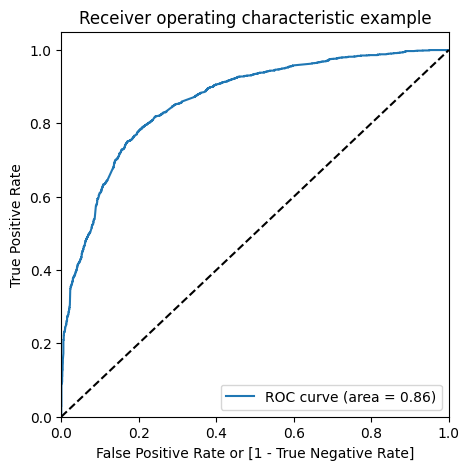

In [394]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.



###Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [396]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.451765  1.000000  0.000000
0.1   0.1  0.557683  0.986241  0.204535
0.2   0.2  0.701890  0.930655  0.513379
0.3   0.3  0.752113  0.876170  0.649887
0.4   0.4  0.787916  0.796368  0.780952
0.5   0.5  0.790154  0.730875  0.839002
0.6   0.6  0.773744  0.634562  0.888435
0.7   0.7  0.735206  0.503577  0.926077
0.8   0.8  0.708603  0.403963  0.959637
0.9   0.9  0.655644  0.253715  0.986848


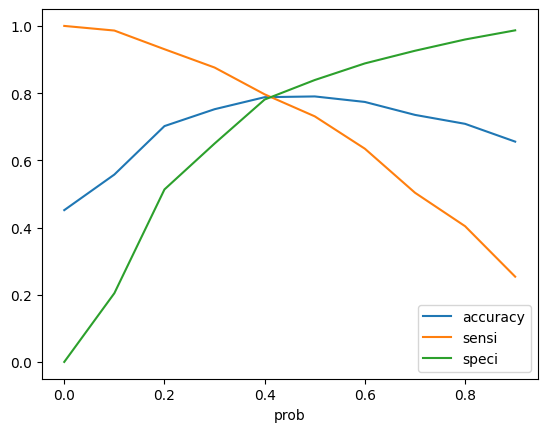

In [397]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


From the curve above, 0.34 is the optimum point to take it as a cutoff probability

In [398]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.383177,1489,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.580969,6678,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.014438,8881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.631424,2512,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.144647,1227,0,1,1,0,0,0,0,0,0,0,0,0


###Assigning Lead Score to the Training data

In [399]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.383177,1489,0,1,1,1,1,0,0,0,0,0,0,1,38
1,0,0.580969,6678,1,1,1,1,1,1,1,0,0,0,0,1,58
2,0,0.014438,8881,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.631424,2512,1,1,1,1,1,1,1,1,0,0,0,1,63
4,0,0.144647,1227,0,1,1,0,0,0,0,0,0,0,0,0,14


### Model evaluation

In [400]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7734957732471407


In [401]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1578,  627],
       [ 284, 1533]])

In [402]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [403]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8436984039625757


In [404]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7156462585034014


In [405]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.28435374149659864


In [408]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7097222222222223


In [407]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8474758324382384


## Precision and Recall
Pecision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [409]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1850,  355],
       [ 489, 1328]])

In [410]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7890671420083185


In [411]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7308750687947165


In [412]:
from sklearn.metrics import precision_score, recall_score

In [413]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))


Precision : 0.7890671420083185


In [414]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7308750687947165


In [415]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4017    1
 4018    1
 4019    0
 4020    0
 4021    0
 Name: Converted, Length: 4022, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 4017    1
 4018    1
 4019    0
 4020    0
 4021    1
 Name: predicted, Length: 4022, dtype: int64)

In [416]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

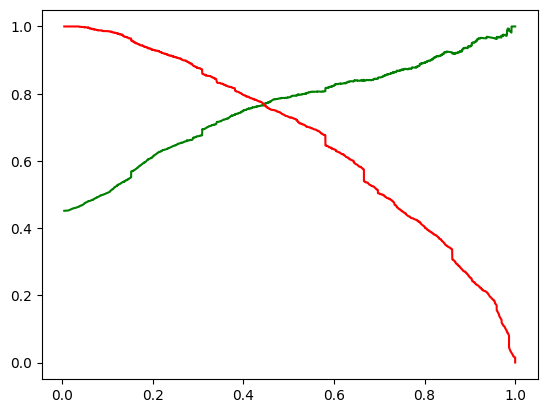

In [417]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##Making predictions on the test set
###Scaling the test data

In [418]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [419]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Unsubscribed
8925,0,-0.885964,1,1,0,0,0,0,0,0,1,0,0,0,0,0
9221,0,1.432848,1,0,1,0,0,0,0,0,1,0,0,0,0,0
7643,1,-0.556739,1,1,0,0,0,0,0,0,0,0,0,0,0,0
741,0,-0.247090,0,0,0,0,1,0,0,0,1,1,0,0,1,0
7166,0,0.373989,1,0,1,0,0,0,1,0,0,0,1,1,0,0


In [420]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8925    0.283319
9221    0.877296
7643    0.045483
741     0.222176
7166    0.898139
1075    0.439756
1816    0.065550
6540    0.865677
4649    0.372762
3664    0.666193
dtype: float64

In [421]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [422]:
# Let's see the head
y_pred_1.head()

,0
8925,0.283319
9221,0.877296
7643,0.045483
741,0.222176
7166,0.898139


In [423]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [424]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [425]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [426]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [427]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8925,0.283319
1,0,9221,0.877296
2,0,7643,0.045483
3,0,741,0.222176
4,1,7166,0.898139


In [428]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [429]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [430]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8925,0,0.283319
1,9221,0,0.877296
2,7643,0,0.045483
3,741,0,0.222176
4,7166,1,0.898139


In [431]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [432]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8925,0,0.283319,0
1,9221,0,0.877296,1
2,7643,0,0.045483,0
3,741,0,0.222176,0
4,7166,1,0.898139,1


In [433]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.783768115942029


In [434]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[662, 265],
       [108, 690]])

In [435]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [436]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8646616541353384


In [437]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7141316073354909


###Assigning Lead Score to the Testing data

In [438]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,8925,0,0.283319,0,28
1,9221,0,0.877296,1,88
2,7643,0,0.045483,0,5
3,741,0,0.222176,0,22
4,7166,1,0.898139,1,90


## Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %

##Results :
1) Comparing the values obtained for Train & Test:
Train Data:
Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %
Test Data:
Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.



In [439]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,9221,0,0.877296,1,88
4,7166,1,0.898139,1,90
7,6540,0,0.865677,1,87
10,7496,1,0.991520,1,99
11,1722,1,0.864384,1,86
...,...,...,...,...,...
1682,1502,1,0.903356,1,90
1685,3532,1,0.985991,1,99
1700,2266,1,0.968140,1,97
1711,1190,1,0.923028,1,92


So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [440]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([9221, 7166, 6540, 7496, 1722, 8836, 6953, 5000, 7234, 6290, 3937,
        560, 5022, 1368, 8261,  472, 1973, 7627, 2623, 1647, 8466, 2010,
       4862, 5714, 3285, 1630, 7991, 2281, 5747, 8650, 1561, 4771, 2594,
       1730, 4388, 5698, 4422, 2926, 3519, 2560,  939, 2042, 3851,  809,
       4200, 5275, 8396, 8089, 8413, 8492, 2018, 8047, 6454, 8048,  243,
       9016, 2403, 2764, 6647, 2011, 7320, 8888,  718, 8540, 9228, 8229,
       1803, 1856, 1007,  454, 3425, 8576, 1883, 2677, 7036, 8596, 8075,
       3488, 2791, 4869, 8568, 3396,   76, 2765, 3180, 8088, 2549, 2684,
       6601, 4947, 4559, 8648, 6771, 3549, 4461,   66,  739, 2664, 2158,
       2978, 8804, 4466,  833, 3725, 2994, 3473, 8594, 4241,  967, 2519,
       8108, 5915, 5686,   37, 7521, 6137, 6666, 5795, 7508, 2914, 6269,
       7171, 1527, 5541, 7021, 4081,  319, 4795, 1572, 3723, 8475, 5195,
        405, 3735,  829,  260, 7495, 1559, 6698, 8293, 8838, 5791, 6461,
       2055, 5666, 3739, 3188, 7501, 4764, 7453, 90

##Recommendations:
* The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
* The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
* The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
* The company should make calls to the leads coming from the lead sources
* "Olark Chat" as these are more likely to get converted.
 The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

* The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

* The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
* The company should not make calls to the leads whose Specialization was
 "Others" as they are not likely to get converted.
* The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.